In [369]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data/10, y, test_size=0.33, random_state=42)



In [372]:
# lr = 0.5
# epochs = 10
# batch_size = 30
# x = tf.placeholder(tf.float32, [None, 3])
# y = tf.placeholder(tf.float32, [None, 1])

# # now declare the weights connecting the input to the hidden layer
# W1 = tf.Variable(tf.random_normal([3, 20], stddev=0.03), name='W1')
# b1 = tf.Variable(tf.random_normal([20]), name='b1')
# # and the weights connecting the hidden layer to the output layer
# W2 = tf.Variable(tf.random_normal([20, 10], stddev=0.03), name='W2')
# b2 = tf.Variable(tf.random_normal([10]), name='b2')

# W3 = tf.Variable(tf.random_normal([10, 1], stddev=0.03), name='W2')
# b3 = tf.Variable(tf.random_normal([1]), name='b2')


# # calculate the output of the hidden layer
# hidden_out = tf.add(tf.matmul(x, W1), b1)
# hidden_out = tf.nn.relu(hidden_out)
# hidden_out = tf.add(tf.matmul(hidden_out, W2), b2)
# hidden_out = tf.nn.relu(hidden_out)
# hidden_out = tf.add(tf.matmul(hidden_out, W3), b3)
# hidden_out = tf.nn.softmax(hidden_out)


# # a = tf.Variable(1, name='a')
# # b = tf.Variable(1, name='b')
# # c = tf.Variable(1, name='c')

# c2 = tf.math.square(c, name='csquared')
# sqrtb = tf.math.sqrt(b, name='bsqrt')
# cb = tf.multiply(c2, sqrtb, name='cb')
# out = tf.add(a, cb, name='out')

# init_op = tf.global_variables_initializer()


In [411]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def noisy_gen_data(num_data, high=10):
    a=np.random.uniform(low=0.0, high=high, size=num_data)
    b=np.random.uniform(low=0.0, high=high, size=num_data)
    c=np.random.uniform(low=0.0, high=high, size=num_data)

    y=a+np.sqrt(b)*c**2

    f = plt.figure(figsize=(32, 14))
    ax1 = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    
    ax1.hist2d(a,y,100,rasterized=True)
    ax1.set_xlabel('a')
    ax1.set_ylabel('y')

    ax2.hist2d(b,y,100,rasterized=True)
    ax2.set_xlabel('b')
    ax2.set_ylabel('y')

    ax3.hist2d(c,y,100,rasterized=True)
    ax3.set_xlabel('c')
    ax3.set_ylabel('y')
    
    return a, b, c, y

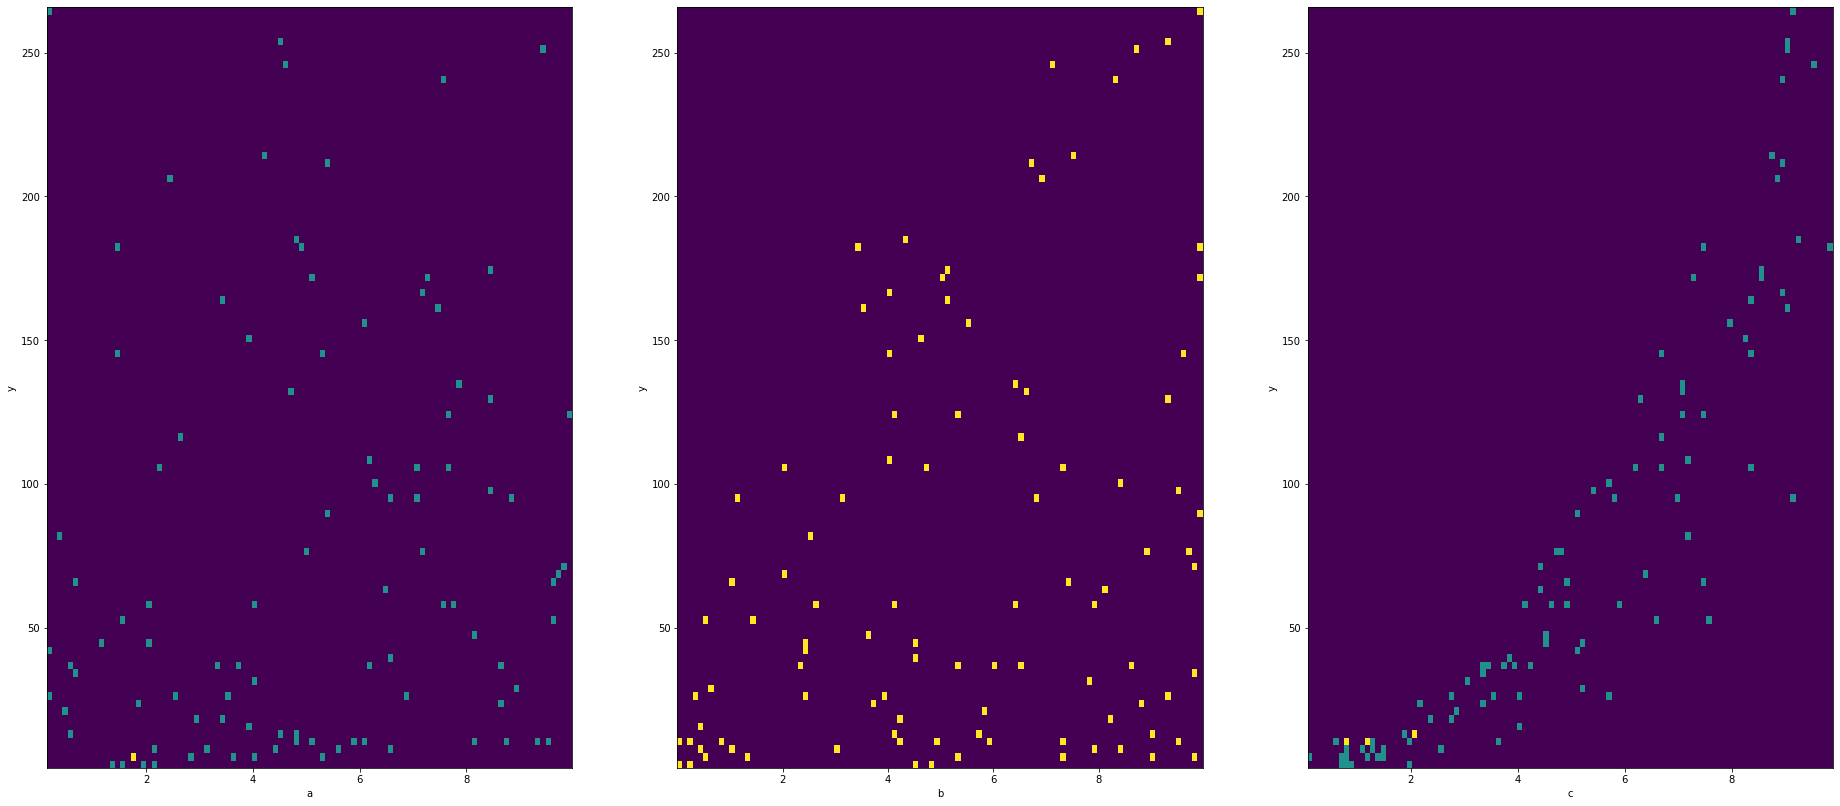

In [412]:
a, b, c, y = noisy_gen_data(100) 
data = np.stack([a, b, c], axis=1)

In [255]:
import numpy as np
from matplotlib import pyplot as plt

a = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
b = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
c = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
# y = a + b*c*a

In [373]:
a = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
b = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
c = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
data = np.stack([a, b, c], axis=1)


SyntaxError: invalid syntax (<ipython-input-373-fac73f3384ea>, line 3)

In [109]:
np.cov(b, y)

array([[0.29409655, 0.04733197],
       [0.04733197, 0.38859492]])

In [17]:
np.correlate(c, y)

array([4.03057138])

In [31]:
np.random.randint(low=0, high=9)

5

In [154]:
l = [1, 2, 5, 4]
sorted(range(len(l)), key=lambda k: l[k])

[0, 1, 3, 2]

In [147]:
d = [4, 3, 2, 1]
sum1 = np.sum(d)
prob=d/sum1
prob

array([0.4, 0.3, 0.2, 0.1])

In [177]:
for i in range(len(d)):
    print(i)

0
1
2
3


In [2363]:
import copy
MATE=0.4
MUTATE=0.5
INDIVIDUALS=100
class Population:
    def __init__(self, individuals, data, y):
        self.individuals=individuals
        if len(individuals) < INDIVIDUALS:
            self.pop_size=INDIVIDUALS
        else:
            self.pop_size=len(individuals)
        self.data = data
        self.y = y
        self.mut_coeffs = np.asarray([0.1, 1.0])
        
        self.scores = [individual.calc_fitness(self.data, self.y) 
             for individual in individuals]
        self.best_ind = np.where(self.scores == np.max(self.scores))[0][0]
        
    def get_best_func(self):
        return self.individuals[self.best_ind]
#         return self.best_ind
        
    def new_pop(self, scores):
#         scores = [individual.calc_fitness(self.data, self.y) 
#              for individual in self.individuals]
        #sorted_indeces = sorted(range(len(scores)), key=lambda k: scores[k])
        sum1 = np.sum(scores)
        prob=scores/sum1
        #new_pop = np.random.choice(self.individuals, int(self.pop_size*4/5), p=prob, replace=True)
        new_pop = np.random.choice(self.individuals, self.pop_size, p=prob, replace=True)
        #new_pop_ind = np.random.choice(len(self.individuals), self.pop_size, p=prob, replace=True)
        #np.append(new_pop, [copy.copy(self.get_best_func())]*(self.pop_size - int(self.pop_size*4/5)))
        #c, p, o = self.get_best_func().get_coeffs()
        #new_cand = [Individual(c, p, o) for _ in range(self.pop_size - int(self.pop_size*4/5))]
        #np.append(new_pop, new_cand)
        #return new_pop_ind
        return new_pop
        
#     def cycle(self):
#         self.individuals = self.new_pop(self.scores)
#         mate_ind=self.mate()
# #         print(mate_ind)
# #         print(self.individuals)
#         if len(mate_ind) > 0:
#             self.mutate(mate_ind)
#         self.scores = [individual.calc_fitness(self.data, self.y) 
#              for individual in self.individuals]
#         self.best_ind = np.where(self.scores == np.max(self.scores))[0][0]
        
    def cycle(self):
        new_pop = self.new_pop(self.scores)
        #prevent call by reference
        self.individuals = [individual.get_copy() for individual in new_pop]
        #self.individuals = self.new_pop(self.scores)
        #mate_ind=np.random.choice(len(self.individuals), int(len(self.individuals)*MATE))
        mate_ind = self.mate()
# #         print(mate_ind)
# #         print(self.individuals)
#         print(len(set([id(individual) for individual in self.individuals])))
#         print(len(set([individual.__repr__() for individual in self.individuals])))
#         print(mate_ind, 'mate_ind')
        if len(mate_ind) > 0:
            self.mutate(mate_ind)
        self.scores = [individual.calc_fitness(self.data, self.y) 
             for individual in self.individuals]
#         for individual in self.individuals:
#             print(individual, individual.get_fitness())
#         print(len(set([id(individual) for individual in self.individuals])))
#         print(len(set([individual.__repr__() for individual in self.individuals])))
        self.best_ind = np.where(self.scores == np.max(self.scores))[0][0]

    def mate(self):
        #select 20 percent of population to mate
        num_to_mate = int(len(self.individuals)*MATE)
        if num_to_mate >= 2:
            if num_to_mate % 2 == 1:
                num_to_mate += 1
#             maters = np.random.choice(self.individuals, num_to_mate, replace=False)
#             for i in range(len(maters)//2):
#                 maters[2*i].mate(maters[2*i+1])
                
            mating_ind = np.random.choice(len(self.individuals), num_to_mate, replace=False)
            for i in range(len(mating_ind)//2):
                self.individuals[2*i].mate(self.individuals[2*i+1])
            return mating_ind
        return None
                
    def mutate(self, mate_ind):
#         num_to_mutate = int(len(self.individuals)*MUTATE)
        num_to_mutate = int(len(mate_ind)*MUTATE)
        mutate_ind = np.random.choice(mate_ind, num_to_mutate, replace=False)
#         print(mutate_ind, 'mutate ind')
#         for i in mutate_ind:
#             print((self.individuals[i]))
#         print(num_to_mutate)
        if len(mutate_ind) > 0:
#             mutate_ind = np.random.choice(len(self.individuals), num_to_mutate)
            for i in mutate_ind:
#                 print(i)
                self.individuals[i].mutate(self.mut_coeffs * sigmoid_gyaku(self.get_best_func().get_fitness()/100))
#                 print(sigmoid(self.get_best_func().get_fitness()))
#                 self.individuals[i].mutate(self.mut_coeffs/
#                                            (self.get_best_func().get_fitness()))
    
#         for i in mutate_ind:
#             print((self.individuals[i]), 'after')
                

            
        

In [2364]:
a = Individual([1], [3], [])
b = a.get_copy()

print(a)
print(b, 'b ')
b.mutate([0.1, 1])
print(a)
print(b, 'b ')


1*(x0)**3 
1*(x0)**3  b 
1*(x0)**3 
0.9*(x0)**3  b 


In [2365]:
import random, copy
class Individual:
    def __init__(self, coeffs, pows, operators):
        if len(coeffs) - 1 != len(operators) or len(coeffs) != len(pows):
            raise ValueError("check inputs")
        self.coeffs = coeffs
        self.pows = pows
        self.num_vars = len(coeffs)
        self.operators = operators
        self.fitness = None
        
    def mutate(self, coeffs):
        r = random.random()
#         print(self, 'before', id(self))
        if r <= 0.75:
            c1 = np.random.choice(len(self.coeffs), 1)[0]
            #self.coeffs[c1] += coeffs[0]*np.random.normal(0, 1)
            self.coeffs[c1] += coeffs[0]*np.random.choice([-1, 1])
        else:
            c2 = np.random.choice(len(self.pows), 1)[0]
            self.pows[c2] += np.random.choice([-1, 1])
#         print(self, 'after', id(self))
#         c2 = np.random.choice(len(self.pows), 1)[0]
#         c1 = np.random.choice(len(self.coeffs), 1)[0]
#         self.coeffs[c1] += coeffs[0]*np.random.normal(0, 1)
# #         self.pows[c2] += coeffs[1]*np.random.normal(0, 1)
#         self.pows[c2] += np.random.choice([-1, 1])
        
    def mate(self, individual):
        choice = np.random.randint(low=0, high=len(self.coeffs))
        c_switch = self.coeffs[choice]
        p_switch = self.pows[choice]
        if choice != 0:  
            o_switch = self.operators[choice-1]
        
        #switch coeffs
        self.coeffs[choice] = individual.coeffs[choice]
        self.pows[choice] = individual.pows[choice]
        if choice != 0:
            self.operators[choice-1] = individual.operators[choice-1]
        individual.coeffs[choice] = c_switch
        individual.pows[choice] = p_switch
        if choice != 0:
            individual.operators[choice-1] = o_switch
            
        #print("choice = ", choice)
    #uses MSE    
    def calc_fitness(self, data, y):
        f = 0
        for i in range(len(data)):
            sq_err = (y[i]-self.calc_row(data[i]))**2
            if (np.iscomplex([sq_err])[0]):
#                 print(data[i], " data")
#                 print(self.calc_row(data[i]), " calc row")
#                 print(sq_err, " sq err")
                raise ValueError("asdf")
            f += sq_err
#         return f
#         if f == 0:
#             self.fitness = 9999999
#         else:
#             self.fitness = 1/f
        mse = f/len(data)
        self.fitness = 1000*(1/(1+mse))
        return self.fitness
    
    def get_fitness(self):
        return self.fitness
    
    def set_fitness(self, f):
        self.fitness = f
    
    def calc_row(self, row):
        s = ""
        for i in range(self.num_vars):
            if row[i] == 0:
                row[i] = row[i] + 0.01
            if i != self.num_vars - 1:
                s += "{0}*({1})**{2} {3} ".format(self.coeffs[i], row[i], self.pows[i], self.operators[i])
            else:
                s += "{0}*({1})**{2} ".format(self.coeffs[i], row[i], self.pows[i])
#             print(s)
        return eval(str(s))

    def get_coeffs(self):
        return self.coeffs, self.pows, self.operators
    
    def get_copy(self):
#         new = Individual(self.coeffs, self.pows, self.operators)
#         new.set_fitness(self.fitness)
#         print(self.coeffs, self.pows, self.operators)
        return copy.deepcopy(self)
    
    def __repr__(self):
        s = ""
        for i in range(self.num_vars):
            if i != self.num_vars - 1:
                s += "{0}*(x{1})**{2} {3} ".format(self.coeffs[i], i, self.pows[i], self.operators[i])
            else:
                s += "{0}*(x{1})**{2} ".format(self.coeffs[i], i, self.pows[i])
        return s

In [2366]:
def sigmoid_gyaku(x):
    return 2/(1+np.exp(x))
    

In [2367]:
for i in range(10):
    A = Individual([1, 1], [2, 3], ['+'])
    B = Individual([2, 4], [6, 8], ['*'])
    A.mate(B)

    #A.calc_row([1, 3])
    A.calc_fitness(data, y)
    

# s = A
# str(s)
# eval(str(s))

In [2368]:
a = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
b = np.array(np.random.uniform(low=-1.0, high=1.0, size=100))
x = np.linspace(-10, 10, 100)
y = x**3

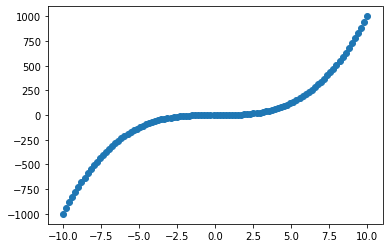

In [2369]:
plt.scatter(x, y)

In [2370]:
a = [[2],[3]]
d = Individual(*a, [])

In [2371]:
individuals = generate_individuals(100, 1, -5, 5, -5, 5, ['+','-','/','*'])


In [2372]:
# def generate_individuals(n, minvals, maxvals, operators, classname):
#     if len(minvals) != len(maxvals):
#         raise ValueError("len(minvals) != len(maxvals)")
#     if len(operators) != len(minvals) - 1:
#         raise ValueError("len(operators) != len(maxvals) - 1")
#     indiv = []
#     for i in range(n):
#         l = [[np.random.randint(low=minvals[j], high=maxvals[j]) for _ in range(len(minvals))] for j in range(len(minvals))]
#         a = np.random.choice(operators, len(minvals)-1)
#         print(*l, a)
#         indiv.append(classname(*l, a))
#     return indiv

In [2373]:
def generate_individuals(n, num_vars, coeff_min, coeff_max, exp_min, exp_max, operators):
    indiv = []
    if num_vars > 1 and len(operators) == 0:
        raise ValueError("no operators")
    for i in range(n):
        l = [np.random.uniform(low=coeff_min, high=coeff_max) for _ in range(num_vars)]
        a = [np.random.randint(low=exp_min, high=exp_max) for _ in range(num_vars)]
        m = np.random.choice(operators, len(l)-1)
        indiv.append(Individual(l, a, m))
    return indiv

In [2374]:
A = Individual([2], [3], [])
B = Individual([3], [3], [])
C = Individual([4], [3], [])

D = Individual([1], [2], [])
E = Individual([4], [2], [])
F = Individual([1], [3], [])

# A = Individual([1, 1, 1], [2, 3, 2], ['+'])
# B = Individual([2, 4, 5], [6, 8, 3], ['*'])
# C = Individual([1, 1, 2], [2, 3, 3], ['+'])
# D = Individual([2, 4, 1], [6, 8, 7], ['*'])
# E = Individual([1, 1, 2], [2, 3, 6], ['+'])
# F = Individual([2, 4, 2], [6, 8, 2], ['*'])
# dd = Population([A, B, C, D, E, F], data, y)
x = np.linspace(-1000, 1000, 100)
y = x**3
xarr = np.array([[i] for i in x])
d = Population([A, B, C, D, E, F], xarr, y)

fitnesses = []
x = []
for i in tqdm(range(10)):
    d.cycle()
    best = d.get_best_func()
    fitnesses.append(best.get_fitness())
    print(best)
    x.append(i)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 10%|████████▎                                                                          | 1/10 [00:00<00:02,  4.16it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  4.18it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  4.22it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  4.13it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  4.02it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:00,  4.05it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  4.11it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  4.11it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  4.19it/s]

20
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1000.0
[0. 0.]
1*(x0)**3 


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.14it/s]


In [2378]:
individuals = generate_individuals(10, 1, 1, 4, 1, 4, ['+','-','/','*'])
d = Population(individuals, xarr, y)

In [2379]:
from tqdm import tqdm

In [2380]:
fitnesses = []
x = []
for i in tqdm(range(50)):
    d.cycle()
    best = d.get_best_func()
    fitnesses.append(best.get_fitness())
    print(best)
    x.append(i)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

20
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
6.594878565174141e-15
[0.1 1. ]
1.686015570687968*(x0)**3 


  2%|█▋                                                                                 | 1/50 [00:00<00:12,  3.99it/s]

20
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
6.5950217279509276e-15
[0.1 1. ]
1.686015570687968*(x0)**3 


  4%|███▎                                                                               | 2/50 [00:00<00:12,  3.91it/s]

20
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
6.5950455236289035e-15
[0.1 1. ]
1.2047422476497773*(x0)**3 


  6%|████▉                                                                              | 3/50 [00:00<00:12,  3.88it/s]

20
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
6.594963575179372e-15
[0.1 1. ]
1.1047422476497772*(x0)**3 


  8%|██████▋                                                                            | 4/50 [00:01<00:11,  3.89it/s]

20
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
6.0113147901072e-13
[0.1 1. ]
1.0047422476497776*(x0)**3 


 10%|████████▎                                                                          | 5/50 [00:01<00:11,  3.86it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 12%|█████████▉                                                                         | 6/50 [00:01<00:11,  3.88it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 14%|███████████▌                                                                       | 7/50 [00:01<00:11,  3.88it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 16%|█████████████▎                                                                     | 8/50 [00:02<00:10,  3.84it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 18%|██████████████▉                                                                    | 9/50 [00:02<00:10,  3.82it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 20%|████████████████▍                                                                 | 10/50 [00:02<00:10,  3.81it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 22%|██████████████████                                                                | 11/50 [00:02<00:10,  3.80it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 24%|███████████████████▋                                                              | 12/50 [00:03<00:09,  3.81it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 26%|█████████████████████▎                                                            | 13/50 [00:03<00:09,  3.83it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 28%|██████████████████████▉                                                           | 14/50 [00:03<00:09,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 30%|████████████████████████▌                                                         | 15/50 [00:03<00:09,  3.60it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 32%|██████████████████████████▏                                                       | 16/50 [00:04<00:09,  3.59it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 34%|███████████████████████████▉                                                      | 17/50 [00:04<00:09,  3.66it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 36%|█████████████████████████████▌                                                    | 18/50 [00:04<00:08,  3.70it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 38%|███████████████████████████████▏                                                  | 19/50 [00:05<00:08,  3.70it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 40%|████████████████████████████████▊                                                 | 20/50 [00:05<00:07,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 42%|██████████████████████████████████▍                                               | 21/50 [00:05<00:07,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 44%|████████████████████████████████████                                              | 22/50 [00:05<00:07,  3.77it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 46%|█████████████████████████████████████▋                                            | 23/50 [00:06<00:07,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 48%|███████████████████████████████████████▎                                          | 24/50 [00:06<00:06,  3.78it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 50%|█████████████████████████████████████████                                         | 25/50 [00:06<00:06,  3.76it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:06<00:06,  3.77it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:07<00:06,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:07<00:05,  3.80it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:07<00:05,  3.82it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:07<00:05,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:08<00:05,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:08<00:04,  3.72it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:08<00:04,  3.73it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:09<00:04,  3.78it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:09<00:03,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:09<00:03,  3.81it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [00:09<00:03,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:10<00:03,  3.71it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:10<00:02,  3.77it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:10<00:02,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:10<00:02,  3.77it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:11<00:02,  3.76it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:11<00:01,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:11<00:01,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:11<00:01,  3.73it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:12<00:01,  3.79it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:12<00:00,  3.81it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:12<00:00,  3.75it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:13<00:00,  3.76it/s]

20
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
2.932545703353811e-10
[0.1 1. ]
1.0047422476497776*(x0)**3 


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.77it/s]


In [1780]:
d.get_best_func()

2.1867839530265893*(x0)**1 

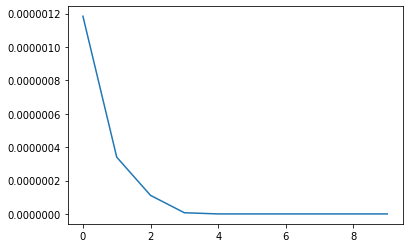

In [1758]:
plt.plot(x, fitnesses)
    